# Project 4 - Part 1

For this assignment, you will be starting an additional portfolio project that you will continue to build on over the remaining weeks of this stack.

- For Part 1, you will be downloading and preparing a crime dataset for time series analysis.
- You will then answer provided stakeholder questions and support your answers with visualizations.

### Chicago Crime Data

#### Preparing Data

In [1]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')

- Your Downloads folder is 'C:\Users\valma\Downloads/'



In [2]:
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [3]:
import pandas as pd

chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899934,12131776,JD327752,08/10/2020 08:30:00 PM,066XX S SACRAMENTO AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,17.0,66.0,05,1157527.0,1860392.0,2020,08/17/2020 03:41:32 PM,41.772671,-87.698104,"(41.772671069, -87.698104059)"
7899935,12082414,JD269218,06/18/2020 09:00:00 PM,093XX S DR MARTIN LUTHER KING JR DR,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,9.0,49.0,06,1180558.0,1843036.0,2020,06/25/2020 03:41:40 PM,41.724546,-87.614211,"(41.724546436, -87.614210743)"
7899936,12118237,JD311791,07/27/2020 03:02:00 PM,033XX W POLK ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,24.0,27.0,08B,1154169.0,1896171.0,2020,08/03/2020 03:41:51 PM,41.870921,-87.709461,"(41.870920735, -87.709461362)"
7899937,12142591,JD340297,08/14/2020 03:00:00 PM,023XX W ROSEMONT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,50.0,2.0,07,1159419.0,1941765.0,2020,08/26/2020 03:40:41 PM,41.995927,-87.688929,"(41.995927389, -87.688928533)"


In [4]:
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
2224635,1333483,G032501,01/01/2001 01:00:00 PM,025XX W 119 ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1161850.0,1825696.0,2001,08/17/2015 03:03:40 PM,41.677371,-87.683218,"(41.677370879, -87.683217554)",2001-01-01 01:00:00
2233642,1310782,G001256,01/01/2001 01:00:00 PM,008XX W 115 ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,NaN,07,1172806.0,1828626.0,2001,08/17/2015 03:03:40 PM,41.685177,-87.643029,"(41.685177431, -87.643029232)",2001-01-01 01:00:00
3923797,3769790,HL141452,01/01/2001 01:00:00 PM,121XX S LOWE AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,...,53.0,06,1174215.0,1824262.0,2001,03/31/2006 10:03:38 PM,41.673171,-87.638000,"(41.673170821, -87.638000169)",2001-01-01 01:00:00
2198725,1310393,G000713,01/01/2001 01:00:00 AM,052XX N EAST RIVER RD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1116671.0,1933824.0,2001,08/17/2015 03:03:40 PM,41.974911,-87.846348,"(41.974911416, -87.846347904)",2001-01-01 01:00:00
1369944,5462733,HN290220,01/01/2001 01:00:00 AM,058XX S INDIANA AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,40.0,20,1178551.0,1866538.0,2001,04/25/2007 05:57:12 AM,41.789084,-87.620849,"(41.789084341, -87.620849345)",2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83785,13217973,JG433076,09/21/2023 12:00:00 AM,085XX S LAFAYETTE AVE,0558,ASSAULT,AGGRAVATED PROTECTED EMPLOYEE - OTHER DANGEROU...,SCHOOL - PUBLIC BUILDING,False,False,...,44.0,04A,1177422.0,1848381.0,2023,09/28/2023 03:42:39 PM,41.739285,-87.625537,"(41.73928511, -87.625536799)",2023-09-21 12:00:00
84047,13217798,JG432794,09/21/2023 12:00:00 AM,016XX W HARRISON ST,0820,THEFT,$500 AND UNDER,STREET,False,False,...,28.0,06,1165781.0,1897452.0,2023,09/28/2023 03:42:39 PM,41.874196,-87.666793,"(41.874196404, -87.666793098)",2023-09-21 12:00:00
84215,13218255,JG433566,09/21/2023 12:00:00 AM,065XX S ELLIS AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,APARTMENT,False,False,...,42.0,14,1184012.0,1861912.0,2023,09/28/2023 03:42:39 PM,41.776264,-87.600970,"(41.776264259, -87.600970382)",2023-09-21 12:00:00
83147,13217795,JG432899,09/21/2023 12:00:00 AM,031XX W HARRISON ST,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,POLICE FACILITY / VEHICLE PARKING LOT,False,False,...,27.0,14,1155457.0,1897193.0,2023,09/28/2023 03:42:39 PM,41.873699,-87.704705,"(41.873699424, -87.704705156)",2023-09-21 12:00:00


In [5]:
chicago_full['Datetime'].dt.year


2224635    2001
2233642    2001
3923797    2001
2198725    2001
1369944    2001
           ... 
83785      2023
84047      2023
84215      2023
83147      2023
83710      2023
Name: Datetime, Length: 7899939, dtype: int64

In [6]:
chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
chicago_full["Year"].value_counts()

2002    486807
2001    485888
2003    475985
2004    469423
2005    453774
2006    448178
2007    437090
2008    427184
2009    392827
2010    370517
2011    351993
2012    336323
2013    307540
2014    275792
2016    269834
2017    269109
2018    268912
2015    264794
2019    261352
2022    238955
2020    212220
2021    208871
2023    186571
Name: Year, dtype: int64

In [7]:
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [8]:
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1333483,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN,2001,41.677371,-87.683218
2001-01-01 01:00:00,1310782,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,2234,22.0,NaN,2001,41.685177,-87.643029
2001-01-01 01:00:00,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,2001,41.673171,-87.638000
2001-01-01 01:00:00,1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.0,NaN,2001,41.974911,-87.846348
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-21 12:00:00,13217973,09/21/2023 12:00:00 AM,ASSAULT,AGGRAVATED PROTECTED EMPLOYEE - OTHER DANGEROU...,SCHOOL - PUBLIC BUILDING,False,False,622,6.0,21.0,2023,41.739285,-87.625537
2023-09-21 12:00:00,13217798,09/21/2023 12:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,1231,12.0,27.0,2023,41.874196,-87.666793
2023-09-21 12:00:00,13218255,09/21/2023 12:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,APARTMENT,False,False,321,3.0,20.0,2023,41.776264,-87.600970


In [9]:
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [10]:
FINAL_DROP = ['Year']

In [11]:
os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")


[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [12]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [13]:
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



### Confirmation

In [16]:
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f, nrows=5) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1333483,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN,41.677371,-87.683218
1,1310782,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,2234,22.0,NaN,41.685177,-87.643029
2,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,41.673171,-87.638000
3,1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.0,NaN,41.974911,-87.846348
4,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849
...,...,...,...,...,...,...,...,...,...,...,...,...
0,12939981,01/01/2023 01:00:00 AM,ROBBERY,ARMED - HANDGUN,GAS STATION,False,False,532,5.0,9.0,41.682335,-87.620652
1,12944392,01/01/2023 01:00:00 PM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,915,9.0,11.0,41.833927,-87.641312
2,12938723,01/01/2023 01:00:00 AM,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,True,1012,10.0,24.0,41.854325,-87.730820
3,12939232,01/01/2023 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,7.0,41.758091,-87.554612


In [17]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    5
2002    5
2003    5
2004    5
2005    5
2006    5
2007    5
2008    5
2009    5
2010    5
2011    5
2012    5
2013    5
2014    5
2015    5
2016    5
2017    5
2018    5
2019    5
2020    5
2021    5
2022    5
2023    5
Name: Date, dtype: int64

---

### Supplemental Data: Holiday Data 

- Check the lesson on "Feature Engineering: Holidays" to see how to use the Python 'holidays' package to add holidays to your dataset.

In [27]:
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1333483,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN,2001,41.677371,-87.683218
2001-01-01 01:00:00,1310782,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,2234,22.0,NaN,2001,41.685177,-87.643029
2001-01-01 01:00:00,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,2001,41.673171,-87.638000
2001-01-01 01:00:00,1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.0,NaN,2001,41.974911,-87.846348
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-21 12:00:00,13217973,09/21/2023 12:00:00 AM,ASSAULT,AGGRAVATED PROTECTED EMPLOYEE - OTHER DANGEROU...,SCHOOL - PUBLIC BUILDING,False,False,622,6.0,21.0,2023,41.739285,-87.625537
2023-09-21 12:00:00,13217798,09/21/2023 12:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,1231,12.0,27.0,2023,41.874196,-87.666793
2023-09-21 12:00:00,13218255,09/21/2023 12:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,APARTMENT,False,False,321,3.0,20.0,2023,41.776264,-87.600970


In [19]:
!pip install holidays

import holidays
import datetime as dt
from holidays import country_holidays

     -------------------------------------- 759.7/759.7 kB 4.0 MB/s eta 0:00:00


In [32]:
all_days = pd.date_range(chicago_final["Date"].min(),chicago_final["Date"].max())
all_days

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-02 01:00:00',
               '2001-01-03 01:00:00', '2001-01-04 01:00:00',
               '2001-01-05 01:00:00', '2001-01-06 01:00:00',
               '2001-01-07 01:00:00', '2001-01-08 01:00:00',
               '2001-01-09 01:00:00', '2001-01-10 01:00:00',
               ...
               '2022-12-22 01:00:00', '2022-12-23 01:00:00',
               '2022-12-24 01:00:00', '2022-12-25 01:00:00',
               '2022-12-26 01:00:00', '2022-12-27 01:00:00',
               '2022-12-28 01:00:00', '2022-12-29 01:00:00',
               '2022-12-30 01:00:00', '2022-12-31 01:00:00'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [33]:
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [34]:
print(all_days[0])
us_holidays.get(all_days[0])

2001-01-01 01:00:00


"New Year's Day"

In [37]:
holiday_list =[us_holidays.get(day) for day in all_days]
holiday_list[:5]

["New Year's Day", None, None, None, None]

In [38]:
chicago_final["US Holiday"] = [us_holidays.get(day) for day in chicago_final['Date']]
chicago_final.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,US Holiday
Datetime,,,,,,,,,,,,,,
2001-01-01 01:00:00,1333483,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN,2001,41.677371,-87.683218,New Year's Day
2001-01-01 01:00:00,1310782,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,2234,22.0,NaN,2001,41.685177,-87.643029,New Year's Day
2001-01-01 01:00:00,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,2001,41.673171,-87.638000,New Year's Day
2001-01-01 01:00:00,1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.0,NaN,2001,41.974911,-87.846348,New Year's Day
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849,New Year's Day


In [40]:
chicago_final['US Holiday'].value_counts()

New Year's Day                                     33731
Independence Day                                   23495
Labor Day                                          22897
Memorial Day                                       21867
Columbus Day                                       20920
Veterans Day                                       20418
Martin Luther King Jr. Day                         18595
Washington's Birthday                              18231
Thanksgiving                                       14797
Christmas Day                                      12418
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
New Year's Day (Observed)                           5528
Christmas Day (Observed)                            4929
Juneteenth National Independence Day                2181
Juneteenth National Independence Day (Observed)     1403
Name: US Holiday, dtype: int64

<AxesSubplot: xlabel='Datetime'>

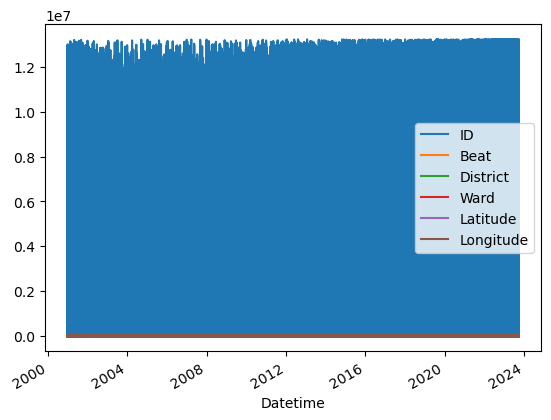

In [42]:
chicago_final.plot()